In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### 分别统计男生和女生出生人数
#####  一共有多少个出重复的名字
#####  横坐标为年份，纵坐标是数量，男女不同的走势图

In [17]:
yob1880 = pd.read_csv('babynames/yob1880.txt',names=['name','sex','year'])
yob1880.head()
print(yob1880)

           name sex  year
0          Mary   F  7065
1          Anna   F  2604
2          Emma   F  2003
3     Elizabeth   F  1939
4        Minnie   F  1746
...         ...  ..   ...
1995     Woodie   M     5
1996     Worthy   M     5
1997     Wright   M     5
1998       York   M     5
1999  Zachariah   M     5

[2000 rows x 3 columns]


In [49]:
df = pd.DataFrame([],columns=['name','sex','num'])

for year in range(1880,2011):
    filepath = 'babynames/yob'+str(year)+'.txt'
    df_cnt = pd.read_csv(filepath,names=['name','sex','num'])
    df = pd.concat([df,df_cnt],sort=False)
    
print('OK')

OK


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690784 entries, 0 to 33837
Data columns (total 4 columns):
name    1690784 non-null object
sex     1690784 non-null object
num     0 non-null object
year    1690784 non-null float64
dtypes: float64(1), object(3)
memory usage: 64.5+ MB


In [30]:
# 统计男生女生的人数
df.groupby('sex')['year'].sum()

sex
F    159990140.0
M    162412587.0
Name: year, dtype: float64

In [34]:
len(df)

1690784

In [32]:
len(set(df['name'].values))

88496

In [42]:
df.groupby('name')['year'].sum().shape

(88496,)

In [35]:
df

,name,sex,num,year
0,Mary,F,NaN,7065.0
1,Anna,F,NaN,2604.0
2,Emma,F,NaN,2003.0
3,Elizabeth,F,NaN,1939.0
4,Minnie,F,NaN,1746.0
5,Margaret,F,NaN,1578.0
6,Ida,F,NaN,1472.0
7,Alice,F,NaN,1414.0
8,Bertha,F,NaN,1320.0
9,Sarah,F,NaN,1288.0


In [37]:
min_year = df['year'].min()
max_year = df['year'].max()
print(min_year,max_year)

5.0 99651.0


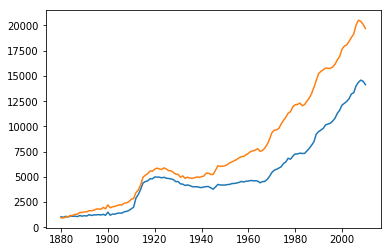

In [46]:
#####  横坐标为年份，纵坐标是数量，男女不同的走势图
plt.figure()

x_index = [i for i in range(1880,2011)]
y_index = []
boy_num = []
gril_num = []
for i in x_index:
    filepath = 'babynames/yob'+str(i)+'.txt'
    df_cnt = pd.read_csv(filepath,names=['name','sex','num'])
    bn = df_cnt[df_cnt['sex']=='M']['num'].count()
    gn = df_cnt[df_cnt['sex']=='F']['num'].count()
    boy_num.append(bn)
    gril_num.append(gn)

plt.plot(x_index,boy_num)
plt.plot(x_index,gril_num)
    

In [54]:
df = pd.DataFrame([],columns=['name','sex','num','year'])

for year in range(1880,2011):
    filepath = 'babynames/yob'+str(year)+'.txt'
    df_cnt = pd.read_csv(filepath,names=['name','sex','num'])
    df_cnt['year']=year
    df = pd.concat([df,df_cnt],sort=False)
    
print('OK')

OK


In [56]:
df

,name,sex,num,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [55]:
df.pivot_table(index='year',columns='sex',values='num',aggfunc=sum)

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
1885,133056,107802
1886,144538,110785
1887,145983,101412
1888,178631,120857


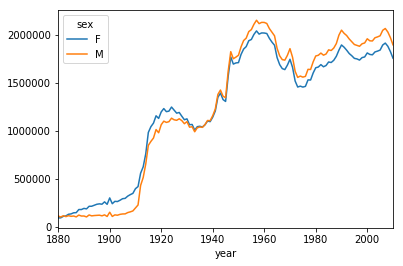

In [58]:
df.pivot_table(index='year',columns='sex',values='num',aggfunc=sum).plot()

ValueError: too many values to unpack (expected 2)

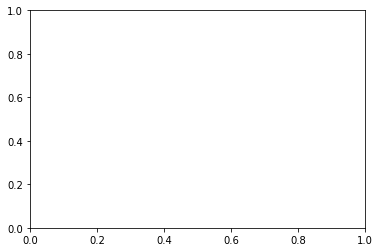

In [61]:
#####  横坐标为年份，纵坐标是数量，男女不同的走势图
plt.figure()

x_index = [i for i in range(1880,2011)]
y_index = []
boy_num = []
gril_num = []
for i in x_index:
    filepath = 'babynames/yob'+str(i)+'.txt'
    df_cnt = pd.read_csv(filepath,names=['name','sex','num'])
    bn = df_cnt[df_cnt['sex']=='M']['num'].count()
    gn = df_cnt[df_cnt['sex']=='F']['num'].count()
    boy_num.append(bn)
    gril_num.append(gn)


plt.plot(x_index,boy_num)
plt.plot(x_index,gril_num)
plt.show()

In [62]:
drinks = pd.read_csv('drinks.csv')

In [68]:
drinks.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       170 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [ ]:
1 、 那个国家饮酒量最大
2、那个大洲饮酒量最大
3、烈酒在那个大洲平均消耗量

In [69]:
drinks[drinks['total_litres_of_pure_alcohol']==drinks['total_litres_of_pure_alcohol'].max()]['country']

15    Belarus
Name: country, dtype: object

In [77]:
drinks.groupby('continent')['total_litres_of_pure_alcohol'].count()

continent
AF    53
AS    44
EU    45
OC    16
SA    12
Name: total_litres_of_pure_alcohol, dtype: int64

In [78]:
drinks.groupby('continent')['total_litres_of_pure_alcohol'].sum()/drinks.groupby('continent')['total_litres_of_pure_alcohol'].count()

continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [79]:
drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()

continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [111]:
import numpy as np
import pandas as pd

df = pd.read_csv('DataAnalyst.csv',encoding='gbk')

In [113]:
df

,city,companyFullName,companyId,companyLabelList,companyShortName,companySize,businessZones,firstType,secondType,education,industryField,positionId,positionAdvantage,positionName,positionLables,salary,workYear
0,上海,纽海信息技术(上海)有限公司,8581,"['技能培训', '节日礼物', '带薪年假', '岗位晋升']",1号店,2000人以上,['张江'],技术,数据开发,硕士,移动互联网,2537336,知名平台,数据分析师,"['分析师', '数据分析', '数据挖掘', '数据']",7k以上,应届毕业生
1,上海,上海点荣金融信息服务有限责任公司,23177,"['节日礼物', '带薪年假', '岗位晋升', '扁平管理']",点融网,500-2000人,"['五里桥', '打浦桥', '制造局路']",技术,数据开发,本科,金融,2427485,"挑战机会,团队好,与大牛合作,工作环境好",数据分析师-CR2017-SH2909,"['分析师', '数据分析', '数据挖掘', '数据']",10k-15k,应届毕业生
2,上海,上海晶樵网络信息技术有限公司,57561,"['技能培训', '绩效奖金', '岗位晋升', '管理规范']",SPD,50-150人,['打浦桥'],设计,数据分析,本科,移动互联网,2511252,"时间自由,领导nic",数据分析师,"['分析师', '数据分析', '数据']",4k-6k,应届毕业生
3,上海,杭州数云信息技术有限公司上海分公司,7502,"['绩效奖金', '股票期权', '五险一金', '通讯津贴']",数云,150-500人,"['龙华', '上海体育场', '万体馆']",市场与销售,数据分析,本科,"企业服务,数据服务",2427530,五险一金 绩效奖金 带薪年假 节日福利,大数据业务分析师【数云校招】,"['商业', '分析师', '大数据', '数据']",6k-8k,应届毕业生
4,上海,上海银基富力信息技术有限公司,130876,"['年底双薪', '通讯津贴', '定期体检', '绩效奖金']",银基富力,15-50人,"['上海影城', '新华路', '虹桥']",技术,软件开发,本科,其他,2245819,在大牛下指导,BI开发/数据分析师,"['分析师', '数据分析', '数据', 'BI']",2k-3k,应届毕业生
5,上海,上海青之桐投资管理有限公司,28095,"['美女多', '出国旅游', '不打卡', '带薪年假']",青桐资本,50-150人,NaN,金融类,天使投资/VC/PE,本科,金融,2580543,"留用机会,精品投行,优秀团队,氛围轻松",助理分析师,"['实习', '投资', 'FA', '行业研究', '分析师']",10k-15k,应届毕业生
6,上海,上海好体信息科技有限公司,2002,"['年底双薪', '股票期权', '扁平管理', '领导好']",足球魔方,150-500人,"['龙华', '植物园', '上海南站']",技术,后端开发,本科,"移动互联网,电子商务",1449715,薪资福利待遇好，晋升空间大,数据工程师,['数据'],7k以上,应届毕业生
7,上海,上海安硕信息技术股份有限公司,21863,"['岗位晋升', '顶尖团队', '福利优厚', '股票期权']",安硕信息（amarsoft）,2000人以上,"['黄兴公园', '长白新村', '延吉']",产品/需求/项目类,产品设计/需求分析,硕士,金融,2568628,健康体检,数据咨询顾问(2017年毕业),"['需求分析', '顾问', '咨询', '咨询顾问', '数据']",5k-7k,应届毕业生
8,上海,上海崇杏健康管理咨询有限公司,121208,"['扁平管理', '弹性工作', '岗位晋升', '领导好']",上海崇杏,15-50人,"['上海电视台', '南京西路', '人民广场']",技术,后端开发,本科,"移动互联网,医疗健康",2416852,"扁平管理,上升空间大,领导好,弹性工作",数据处理工程师（实习生）,"['后端开发', '数据']",4k-8k,应届毕业生
9,上海,五五海淘（上海）科技股份有限公司,58109,"['股票期权', '带薪年假', '绩效奖金', '岗位晋升']",55海淘,150-500人,"['漕宝路', '万源城', '东兰路']",技术,后端开发,本科,电子商务,1605795,向大牛学习，有留司机会,数据处理实习生,['数据'],2k-4k,应届毕业生


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6876 entries, 0 to 6875
Data columns (total 17 columns):
city                 6876 non-null object
companyFullName      6876 non-null object
companyId            6876 non-null int64
companyLabelList     6170 non-null object
companyShortName     6876 non-null object
companySize          6876 non-null object
businessZones        4873 non-null object
firstType            6869 non-null object
secondType           6870 non-null object
education            6876 non-null object
industryField        6876 non-null object
positionId           6876 non-null int64
positionAdvantage    6876 non-null object
positionName         6876 non-null object
positionLables       6844 non-null object
salary               6876 non-null object
workYear             6876 non-null object
dtypes: int64(2), object(15)
memory usage: 913.3+ KB


In [115]:
len(df.positionId.unique())

5031

In [116]:
df_duplicates = df.drop_duplicates(subset='positionId',keep='first')

In [117]:
df_duplicates.shape


(5031, 17)

In [123]:
def cut_words(word):
    word = str(word)
    lists = word.split('-')
    min , max = 0,0
    if(len(lists)!=1):
        min = lists[0][:-1]
        max = lists[1][:-1]
    else:
        lists = split('k')
        min = lists[0]
        max = None
    return min,max

def cut_word(word):
    position = word.find('-')
    if position!=-1:
        bottomSalary = word[:position-1]
    else:
        position = word.upper().find('K')
        bottomSalary = word[:position]
    return bottomSalary

def cut_word2(word):
    position = word.find('-')
    if position!=-1:
        topSalary = word[position+1:-1]
    else:
        topSalary = None
    return topSalary

def cut_word3(word):
    position = word.find('-')
    if position!=-1:
        Salary = (int(word[position+1:-1])+int(word[:position-1]))/2*1.0
    else:
        Salary = None
    return Salary
df_duplicates.salary.apply(cut_word3)

0        NaN
1       12.5
2        5.0
3        7.0
4        2.5
        ... 
6054    20.0
6330    22.5
6465    35.0
6605     5.0
6766    22.5
Name: salary, Length: 5031, dtype: float64

In [129]:
df_duplicates['mean']=df_duplicates.salary.apply(cut_word3)

C:\Users\流痕~\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [130]:
df_duplicates

,city,companyFullName,companyId,companyLabelList,companyShortName,companySize,businessZones,firstType,secondType,education,industryField,positionId,positionAdvantage,positionName,positionLables,salary,workYear,mean
0,上海,纽海信息技术(上海)有限公司,8581,"['技能培训', '节日礼物', '带薪年假', '岗位晋升']",1号店,2000人以上,['张江'],技术,数据开发,硕士,移动互联网,2537336,知名平台,数据分析师,"['分析师', '数据分析', '数据挖掘', '数据']",7k以上,应届毕业生,NaN
1,上海,上海点荣金融信息服务有限责任公司,23177,"['节日礼物', '带薪年假', '岗位晋升', '扁平管理']",点融网,500-2000人,"['五里桥', '打浦桥', '制造局路']",技术,数据开发,本科,金融,2427485,"挑战机会,团队好,与大牛合作,工作环境好",数据分析师-CR2017-SH2909,"['分析师', '数据分析', '数据挖掘', '数据']",10k-15k,应届毕业生,12.5
2,上海,上海晶樵网络信息技术有限公司,57561,"['技能培训', '绩效奖金', '岗位晋升', '管理规范']",SPD,50-150人,['打浦桥'],设计,数据分析,本科,移动互联网,2511252,"时间自由,领导nic",数据分析师,"['分析师', '数据分析', '数据']",4k-6k,应届毕业生,5.0
3,上海,杭州数云信息技术有限公司上海分公司,7502,"['绩效奖金', '股票期权', '五险一金', '通讯津贴']",数云,150-500人,"['龙华', '上海体育场', '万体馆']",市场与销售,数据分析,本科,"企业服务,数据服务",2427530,五险一金 绩效奖金 带薪年假 节日福利,大数据业务分析师【数云校招】,"['商业', '分析师', '大数据', '数据']",6k-8k,应届毕业生,7.0
4,上海,上海银基富力信息技术有限公司,130876,"['年底双薪', '通讯津贴', '定期体检', '绩效奖金']",银基富力,15-50人,"['上海影城', '新华路', '虹桥']",技术,软件开发,本科,其他,2245819,在大牛下指导,BI开发/数据分析师,"['分析师', '数据分析', '数据', 'BI']",2k-3k,应届毕业生,2.5
5,上海,上海青之桐投资管理有限公司,28095,"['美女多', '出国旅游', '不打卡', '带薪年假']",青桐资本,50-150人,NaN,金融类,天使投资/VC/PE,本科,金融,2580543,"留用机会,精品投行,优秀团队,氛围轻松",助理分析师,"['实习', '投资', 'FA', '行业研究', '分析师']",10k-15k,应届毕业生,12.5
6,上海,上海好体信息科技有限公司,2002,"['年底双薪', '股票期权', '扁平管理', '领导好']",足球魔方,150-500人,"['龙华', '植物园', '上海南站']",技术,后端开发,本科,"移动互联网,电子商务",1449715,薪资福利待遇好，晋升空间大,数据工程师,['数据'],7k以上,应届毕业生,NaN
7,上海,上海安硕信息技术股份有限公司,21863,"['岗位晋升', '顶尖团队', '福利优厚', '股票期权']",安硕信息（amarsoft）,2000人以上,"['黄兴公园', '长白新村', '延吉']",产品/需求/项目类,产品设计/需求分析,硕士,金融,2568628,健康体检,数据咨询顾问(2017年毕业),"['需求分析', '顾问', '咨询', '咨询顾问', '数据']",5k-7k,应届毕业生,6.0
8,上海,上海崇杏健康管理咨询有限公司,121208,"['扁平管理', '弹性工作', '岗位晋升', '领导好']",上海崇杏,15-50人,"['上海电视台', '南京西路', '人民广场']",技术,后端开发,本科,"移动互联网,医疗健康",2416852,"扁平管理,上升空间大,领导好,弹性工作",数据处理工程师（实习生）,"['后端开发', '数据']",4k-8k,应届毕业生,6.0
9,上海,五五海淘（上海）科技股份有限公司,58109,"['股票期权', '带薪年假', '绩效奖金', '岗位晋升']",55海淘,150-500人,"['漕宝路', '万源城', '东兰路']",技术,后端开发,本科,电子商务,1605795,向大牛学习，有留司机会,数据处理实习生,['数据'],2k-4k,应届毕业生,3.0
